In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
n_transactions = 5000
data = {
    "transaction_value": np.random.exponential(scale=2.5, size=n_transactions),
    "gas_fee": np.random.normal(loc=0.02, scale=0.01, size=n_transactions),
    "tx_per_wallet": np.random.poisson(lam=3, size=n_transactions),
    "time_gap": np.random.exponential(scale=10, size=n_transactions),
    "sender_balance": np.random.exponential(scale=50, size=n_transactions),
    "receiver_balance": np.random.exponential(scale=50, size=n_transactions),
}
df = pd.DataFrame(data)
df[df < 0] = 0
df.head()


,transaction_value,gas_fee,tx_per_wallet,time_gap,sender_balance,receiver_balance
0,1.173170,0.014030,1,3.510578,1.952173,23.394507
1,7.525304,0.000000,3,6.488765,11.985564,4.676600
2,3.291864,0.015878,1,5.013518,4.101928,29.495856
3,2.282356,0.029135,4,1.455687,5.640955,81.537994
4,0.424062,0.025376,2,8.667266,0.776270,5.198094


In [ ]:

df.describe()


,transaction_value,gas_fee,tx_per_wallet,time_gap,sender_balance,receiver_balance
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2.474395,0.019918,3.02300,9.910321,50.218939,49.687584
std,2.467628,0.009958,1.75325,9.877465,50.506188,50.113056
min,0.000029,0.000000,0.00000,0.000055,0.029747,0.000837
25%,0.698831,0.013005,2.00000,2.832611,14.383481,14.014263
50%,1.732911,0.019800,3.00000,6.943454,34.311635,34.168224
75%,3.446816,0.026748,4.00000,13.458712,70.615089,69.039533
max,20.431114,0.055291,11.00000,84.654161,456.008821,524.429154


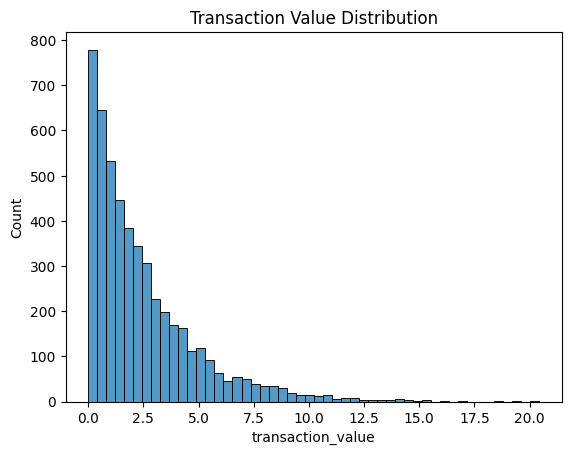

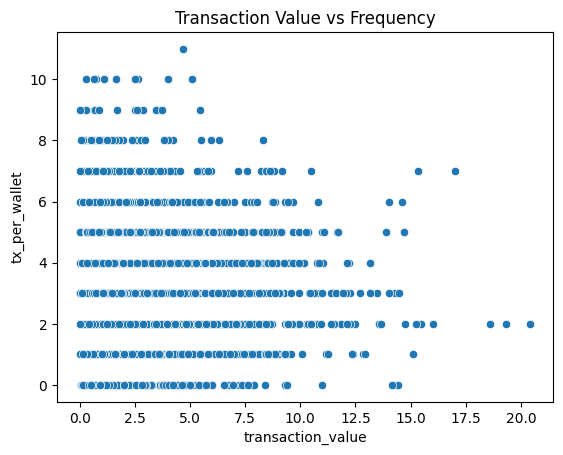

In [ ]:
plt.figure()
sns.histplot(df["transaction_value"], bins=50)
plt.title("Transaction Value Distribution")
plt.show()

plt.figure()
sns.scatterplot(x=df["transaction_value"], y=df["tx_per_wallet"])
plt.title("Transaction Value vs Frequency")
plt.show()


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_features, columns=df.columns)
scaled_df.head()


,transaction_value,gas_fee,tx_per_wallet,time_gap,sender_balance,receiver_balance
0,-0.527371,-0.591386,-1.153972,-0.647978,-0.955756,-0.524728
1,2.047073,-2.000529,-0.013120,-0.346435,-0.757079,-0.898279
2,0.331310,-0.405827,-1.153972,-0.495805,-0.913188,-0.402964
3,-0.077831,0.925646,0.557307,-0.856037,-0.882712,0.635635
4,-0.830975,0.548164,-0.583546,-0.125860,-0.979041,-0.887871


from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.03,
    random_state=42
)
iso_forest.fit(scaled_df)
df["fraud_label"] = iso_forest.predict(scaled_df)
df["fraud_label"] = df["fraud_label"].map({1: 0, -1: 1})
df.head()

In [ ]:
# Count normal vs suspicious transactions
df["fraud_label"].value_counts()


KeyError: 'fraud_label'

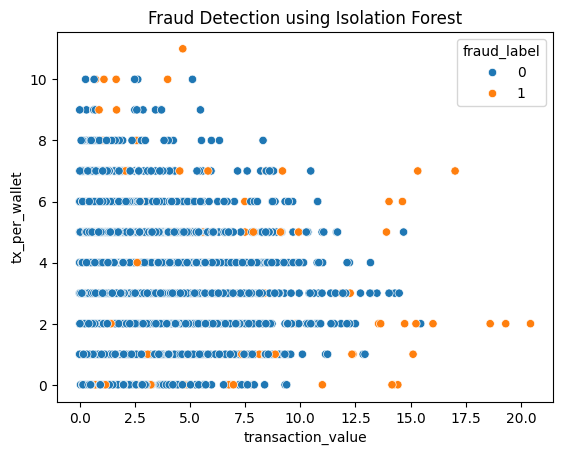

In [ ]:
plt.figure()
sns.scatterplot(
    x=df["transaction_value"],
    y=df["tx_per_wallet"],
    hue=df["fraud_label"]
)
plt.title("Fraud Detection using Isolation Forest")
plt.show()


In [ ]:
# Advanced Step A1: Simulate wallet identities

n_wallets = 800

df["from_wallet"] = np.random.randint(1, n_wallets + 1, size=len(df))
df["to_wallet"] = np.random.randint(1, n_wallets + 1, size=len(df))

df.head()


,transaction_value,gas_fee,tx_per_wallet,time_gap,sender_balance,receiver_balance,fraud_label,from_wallet,to_wallet
0,1.173170,0.014030,1,3.510578,1.952173,23.394507,0,506,98
1,7.525304,0.000000,3,6.488765,11.985564,4.676600,0,624,793
2,3.291864,0.015878,1,5.013518,4.101928,29.495856,0,169,322
3,2.282356,0.029135,4,1.455687,5.640955,81.537994,0,387,713
4,0.424062,0.025376,2,8.667266,0.776270,5.198094,0,321,674


In [ ]:
# Advanced Step A2: Simulate transaction timestamps

df["timestamp"] = np.cumsum(
    np.random.exponential(scale=5, size=len(df))
)


In [ ]:
# Advanced Step A3: Wallet-level behavioral features

wallet_stats = df.groupby("from_wallet").agg(
    avg_tx_value=("transaction_value", "mean"),
    tx_count=("transaction_value", "count"),
    avg_time_gap=("time_gap", "mean")
).reset_index()

df = df.merge(wallet_stats, on="from_wallet", how="left")

df.head()


,transaction_value,gas_fee,tx_per_wallet,time_gap,sender_balance,receiver_balance,fraud_label,from_wallet,to_wallet,timestamp,avg_tx_value,tx_count,avg_time_gap
0,1.173170,0.014030,1,3.510578,1.952173,23.394507,0,506,98,1.774763,2.544996,10,7.941528
1,7.525304,0.000000,3,6.488765,11.985564,4.676600,0,624,793,7.468860,2.614823,9,13.869242
2,3.291864,0.015878,1,5.013518,4.101928,29.495856,0,169,322,10.287478,2.217223,4,7.090176
3,2.282356,0.029135,4,1.455687,5.640955,81.537994,0,387,713,28.359697,1.717703,5,10.557412
4,0.424062,0.025376,2,8.667266,0.776270,5.198094,0,321,674,36.697406,3.185197,9,5.723274


In [ ]:
# Advanced Step A4: Transaction velocity

df["tx_velocity"] = df["transaction_value"] / (df["time_gap"] + 1)


In [ ]:
# Advanced Step A6: Select advanced features

advanced_features = [
    "transaction_value",
    "gas_fee",
    "tx_per_wallet",
    "time_gap",
    "sender_balance",
    "receiver_balance",
    "avg_tx_value",
    "tx_count",
    "avg_time_gap",
    "tx_velocity"
]

X_adv = df[advanced_features]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_adv = StandardScaler()
X_adv_scaled = scaler_adv.fit_transform(X_adv)


In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest_adv = IsolationForest(
    n_estimators=200,
    contamination=0.03,
    random_state=42
)
iso_forest_adv.fit(X_adv_scaled)
df["adv_fraud_flag"] = iso_forest_adv.predict(X_adv_scaled)

# Convert labels: 1 = Normal, -1 = A\
nomaly
df["adv_fraud_flag"] = df["adv_fraud_flag"].map({1: 0, -1: 1})

df[["transaction_value", "tx_velocity", "adv_fraud_flag"]].head()


,transaction_value,tx_velocity,adv_fraud_flag
0,1.173170,0.260093,0
1,7.525304,1.004879,0
2,3.291864,0.547411,0
3,2.282356,0.929417,0
4,0.424062,0.043866,0


from matplotlib import pyplot as plt
_df_0['transaction_value'].plot(kind='hist', bins=20, title='transaction_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tx_velocity'].plot(kind='hist', bins=20, title='tx_velocity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='transaction_value', y='tx_velocity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['adv_fraud_flag']
  ys = series['transaction_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('adv_fraud_flag', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('adv_fraud_flag')
_ = plt.ylabel('transaction_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['adv_fraud_flag']
  ys = series['tx_velocity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('adv_fraud_flag', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('adv_fraud_flag')
_ = plt.ylabel('tx_velocity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['adv_fraud_flag']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'adv_fraud_flag'}, axis=1)
              .sort_values('adv_fraud_flag', ascending=True))
  xs = counted['adv_fraud_flag']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('adv_fraud_flag', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('adv_fraud_flag')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['transaction_value'].plot(kind='line', figsize=(8, 4), title='transaction_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['tx_velocity'].plot(kind='line', figsize=(8, 4), title='tx_velocity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['transaction_value'].plot(kind='hist', bins=20, title='transaction_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['tx_velocity'].plot(kind='hist', bins=20, title='tx_velocity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='index', y='transaction_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='transaction_value', y='tx_velocity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['transaction_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('transaction_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tx_velocity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tx_velocity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['adv_fraud_flag']
  ys = series['transaction_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('adv_fraud_flag', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('adv_fraud_flag')
_ = plt.ylabel('transaction_value')

from matplotlib import pyplot as plt
_df_17['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['transaction_value'].plot(kind='line', figsize=(8, 4), title='transaction_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['tx_velocity'].plot(kind='line', figsize=(8, 4), title='tx_velocity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
comparison = pd.crosstab(df["fraud_label"], df["adv_fraud_flag"])
comparison


adv_fraud_flag,0,1
fraud_label,,
0,4771,79
1,79,71


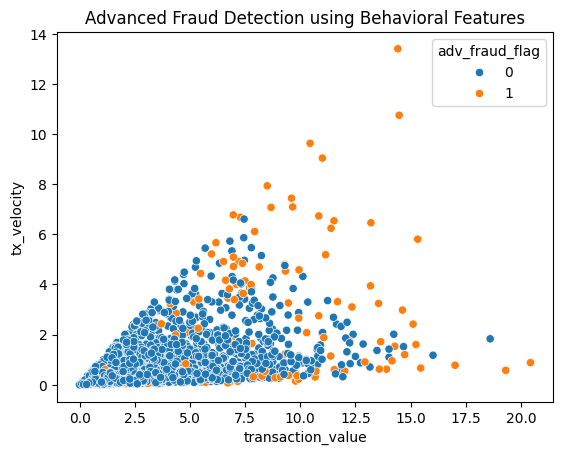

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.scatterplot(
    x=df["transaction_value"],
    y=df["tx_velocity"],
    hue=df["adv_fraud_flag"]
)
plt.title("Advanced Fraud Detection using Behavioral Features")
plt.show()


In [ ]:
# Anomaly scores (lower = more abnormal)
df["anomaly_score"] = iso_forest_adv.decision_function(X_adv_scaled)

# Normalize to 0–100 risk score
df["risk_score"] = 100 * (
    (df["anomaly_score"].max() - df["anomaly_score"]) /
    (df["anomaly_score"].max() - df["anomaly_score"].min())
)

df[["risk_score", "adv_fraud_flag"]].head()


,risk_score,adv_fraud_flag
0,9.080620,0
1,34.047458,0
2,11.114608,0
3,17.140421,0
4,16.738942,0


In [ ]:
import networkx as nx

# Create directed graph
G = nx.DiGraph()

# Add edges: from_wallet -> to_wallet
for _, row in df.iterrows():
    G.add_edge(
        row["from_wallet"],
        row["to_wallet"],
        weight=row["transaction_value"]
    )

# Basic graph info
G.number_of_nodes(), G.number_of_edges()


(800, 4978)

In [ ]:
# Compute in-degree and out-degree
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

df["in_degree"] = df["from_wallet"].map(in_degree)
df["out_degree"] = df["from_wallet"].map(out_degree)

df[["from_wallet", "in_degree", "out_degree"]].head()


,from_wallet,in_degree,out_degree
0,506,5,10
1,624,9,9
2,169,6,4
3,387,16,5
4,321,5,9


In [ ]:
import networkx as nx


In [ ]:
G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(
        row["from_wallet"],
        row["to_wallet"],
        weight=row["transaction_value"]
    )

G.number_of_nodes(), G.number_of_edges()


NameError: name 'df' is not defined

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_transactions = 5000

data = {
    "transaction_value": np.random.exponential(scale=2.5, size=n_transactions),
    "gas_fee": np.random.normal(loc=0.02, scale=0.01, size=n_transactions),
    "tx_per_wallet": np.random.poisson(lam=3, size=n_transactions),
    "time_gap": np.random.exponential(scale=10, size=n_transactions),
    "sender_balance": np.random.exponential(scale=50, size=n_transactions),
    "receiver_balance": np.random.exponential(scale=50, size=n_transactions),
}

df = pd.DataFrame(data)
df[df < 0] = 0

df.head()


,transaction_value,gas_fee,tx_per_wallet,time_gap,sender_balance,receiver_balance
0,1.173170,0.014030,1,3.510578,1.952173,23.394507
1,7.525304,0.000000,3,6.488765,11.985564,4.676600
2,3.291864,0.015878,1,5.013518,4.101928,29.495856
3,2.282356,0.029135,4,1.455687,5.640955,81.537994
4,0.424062,0.025376,2,8.667266,0.776270,5.198094


In [ ]:
# Wallet IDs
n_wallets = 800
df["from_wallet"] = np.random.randint(1, n_wallets + 1, size=len(df))
df["to_wallet"] = np.random.randint(1, n_wallets + 1, size=len(df))


In [ ]:
# Timestamp
df["timestamp"] = np.cumsum(
    np.random.exponential(scale=5, size=len(df))
)


In [ ]:
import networkx as nx

G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(
        row["from_wallet"],
        row["to_wallet"],
        weight=row["transaction_value"]
    )

G.number_of_nodes(), G.number_of_edges()



(800, 4978)

In [ ]:
required_cols = [
    "risk_score",
    "graph_risk",
    "cycle_flag",
    "final_risk_score",
    "tx_velocity",
    "transaction_value",
    "out_degree"
]

missing = [c for c in required_cols if c not in df.columns]
missing


['risk_score',
 'graph_risk',
 'cycle_flag',
 'final_risk_score',
 'tx_velocity',
 'out_degree']

In [ ]:
def explain_transaction(row):
    reasons = []

    if row["tx_velocity"] > df["tx_velocity"].quantile(0.95):
        reasons.append("High transaction velocity")

    if row["transaction_value"] > df["transaction_value"].quantile(0.95):
        reasons.append("Unusually large transaction value")

    if row["out_degree"] > df["out_degree"].quantile(0.95):
        reasons.append("High fund dispersion to multiple wallets")

    if row["cycle_flag"] == 1:
        reasons.append("Involved in circular transaction flow")

    if not reasons:
        reasons.append("Normal transaction behavior")

    return "; ".join(reasons)


In [ ]:
df["explanation"] = df.apply(explain_transaction, axis=1)
df[["final_risk_score", "explanation"]].head()


KeyError: 'tx_velocity'

In [ ]:
df.columns


Index(['transaction_value', 'gas_fee', 'tx_per_wallet', 'time_gap',
       'sender_balance', 'receiver_balance', 'from_wallet', 'to_wallet',
       'timestamp'],
      dtype='object')

In [ ]:
# Recreate transaction velocity feature
df["tx_velocity"] = df["transaction_value"] / (df["time_gap"] + 1)

df[["transaction_value", "time_gap", "tx_velocity"]].head()


,transaction_value,time_gap,tx_velocity
0,1.173170,3.510578,0.260093
1,7.525304,6.488765,1.004879
2,3.291864,5.013518,0.547411
3,2.282356,1.455687,0.929417
4,0.424062,8.667266,0.043866


In [ ]:
def explain_transaction(row):
    reasons = []

    if row["tx_velocity"] > df["tx_velocity"].quantile(0.95):
        reasons.append("High transaction velocity")

    if row["transaction_value"] > df["transaction_value"].quantile(0.95):
        reasons.append("Unusually large transaction value")

    if row["out_degree"] > df["out_degree"].quantile(0.95):
        reasons.append("High fund dispersion to multiple wallets")

    if row["cycle_flag"] == 1:
        reasons.append("Involved in circular transaction flow")

    if not reasons:
        reasons.append("Normal transaction behavior")

    return "; ".join(reasons)


In [ ]:
df["explanation"] = df.apply(explain_transaction, axis=1)
df[["final_risk_score", "explanation"]].head()


KeyError: 'out_degree'

In [ ]:
df.columns


Index(['transaction_value', 'gas_fee', 'tx_per_wallet', 'time_gap',
       'sender_balance', 'receiver_balance', 'from_wallet', 'to_wallet',
       'timestamp', 'tx_velocity'],
      dtype='object')

In [ ]:
import networkx as nx

# Rebuild the graph (safe even if it already exists)
G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(
        row["from_wallet"],
        row["to_wallet"],
        weight=row["transaction_value"]
    )

# Compute degrees
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Map degrees back to dataframe
df["in_degree"] = df["from_wallet"].map(in_degree)
df["out_degree"] = df["from_wallet"].map(out_degree)

df[["from_wallet", "in_degree", "out_degree"]].head()


,from_wallet,in_degree,out_degree
0,506,5,10
1,624,9,9
2,169,6,4
3,387,16,5
4,321,5,9


In [ ]:
df["explanation"] = df.apply(explain_transaction, axis=1)
df[["final_risk_score", "explanation"]].head()


KeyError: 'cycle_flag'

In [ ]:
import networkx as nx

# Rebuild graph
G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(
        row["from_wallet"],
        row["to_wallet"],
        weight=row["transaction_value"]
    )

# Degree features
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

df["in_degree"] = df["from_wallet"].map(in_degree)
df["out_degree"] = df["from_wallet"].map(out_degree)

# Safe cycle detection (short cycles only)
cycle_wallets = set()
for cycle in nx.simple_cycles(G):
    if len(cycle) <= 4:
        cycle_wallets.update(cycle)

df["cycle_flag"] = df["from_wallet"].apply(
    lambda x: 1 if x in cycle_wallets else 0
)

# Verify
df[["in_degree", "out_degree", "cycle_flag"]].head()


In [ ]:
# FAST cycle heuristic: reciprocal transactions (A <-> B)

edge_set = set(G.edges())
reciprocal_wallets = set()

for u, v in edge_set:
    if (v, u) in edge_set:
        reciprocal_wallets.add(u)
        reciprocal_wallets.add(v)

df["cycle_flag"] = df["from_wallet"].apply(
    lambda x: 1 if x in reciprocal_wallets else 0
)

df["cycle_flag"].value_counts()


NameError: name 'G' is not defined

In [ ]:
import networkx as nx

# Rebuild graph G (FAST)
G = nx.DiGraph()

for _, row in df.iterrows():
    G.add_edge(
        row["from_wallet"],
        row["to_wallet"]
    )

# FAST cycle heuristic: reciprocal transactions (A <-> B)
edge_set = set(G.edges())
reciprocal_wallets = set()

for u, v in edge_set:
    if (v, u) in edge_set:
        reciprocal_wallets.add(u)
        reciprocal_wallets.add(v)

df["cycle_flag"] = df["from_wallet"].apply(
    lambda x: 1 if x in reciprocal_wallets else 0
)

df["cycle_flag"].value_counts()


NameError: name 'df' is not defined

In [ ]:
# ===============================
# STABLE END-TO-END PIPELINE
# ===============================

import numpy as np
import pandas as pd
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# -------------------------------
# 1. Create dataset
# -------------------------------
np.random.seed(42)
n = 5000

df = pd.DataFrame({
    "transaction_value": np.random.exponential(2.5, n),
    "gas_fee": np.random.normal(0.02, 0.01, n).clip(min=0),
    "tx_per_wallet": np.random.poisson(3, n),
    "time_gap": np.random.exponential(10, n),
    "sender_balance": np.random.exponential(50, n),
    "receiver_balance": np.random.exponential(50, n),
})

# Wallets
n_wallets = 800
df["from_wallet"] = np.random.randint(1, n_wallets + 1, n)
df["to_wallet"] = np.random.randint(1, n_wallets + 1, n)

# -------------------------------
# 2. Temporal feature
# -------------------------------
df["tx_velocity"] = df["transaction_value"] / (df["time_gap"] + 1)

# -------------------------------
# 3. Graph features (FAST)
# -------------------------------
G = nx.DiGraph()
G.add_edges_from(zip(df["from_wallet"], df["to_wallet"]))

in_deg = dict(G.in_degree())
out_deg = dict(G.out_degree())

df["in_degree"] = df["from_wallet"].map(in_deg)
df["out_degree"] = df["from_wallet"].map(out_deg)

# Reciprocal-cycle heuristic
edges = set(G.edges())
reciprocal = {u for u, v in edges if (v, u) in edges}
df["cycle_flag"] = df["from_wallet"].apply(lambda x: 1 if x in reciprocal else 0)

# -------------------------------
# 4. Isolation Forest (Advanced)
# -------------------------------
features = [
    "transaction_value", "gas_fee", "tx_per_wallet",
    "time_gap", "sender_balance", "receiver_balance",
    "tx_velocity", "in_degree", "out_degree", "cycle_flag"
]

X = StandardScaler().fit_transform(df[features])

model = IsolationForest(contamination=0.03, random_state=42)
model.fit(X)

scores = model.decision_function(X)
df["final_risk_score"] = 100 * (scores.max() - scores) / (scores.max() - scores.min())

# -------------------------------
# 5. Explainable AI
# -------------------------------
def explain(row):
    reasons = []
    if row.tx_velocity > df.tx_velocity.quantile(0.95):
        reasons.append("High transaction velocity")
    if row.transaction_value > df.transaction_value.quantile(0.95):
        reasons.append("Large transaction value")
    if row.out_degree > df.out_degree.quantile(0.95):
        reasons.append("High fund dispersion")
    if row.cycle_flag == 1:
        reasons.append("Reciprocal transaction pattern")
    return "; ".join(reasons) if reasons else "Normal behavior"

df["explanation"] = df.apply(explain, axis=1)

# -------------------------------
# 6. Final output check
# -------------------------------
df[["final_risk_score", "cycle_flag", "explanation"]].head()


,final_risk_score,cycle_flag,explanation
0,12.665598,0,Normal behavior
1,34.244274,0,Large transaction value
2,14.507507,0,Normal behavior
3,41.715889,0,Normal behavior
4,8.651159,0,Normal behavior


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
lof_labels = lof.fit_predict(X)

# Convert to risk signal
df["lof_flag"] = (lof_labels == -1).astype(int)


In [ ]:
df["advanced_risk_score"] = (
    0.7 * df["final_risk_score"] +
    0.3 * df["lof_flag"] * 100
)


In [ ]:
df["burst_score"] = (
    df["tx_velocity"] >
    df["tx_velocity"].rolling(50, min_periods=1).mean()
).astype(int)


In [ ]:
df["advanced_risk_score"] = (
    0.6 * df["advanced_risk_score"] +
    0.4 * df["burst_score"] * 100
)


In [ ]:
df["wallet_role"] = "Normal"
df.loc[(df["out_degree"] > df["in_degree"]) & (df["out_degree"] > 5), "wallet_role"] = "Distributor"
df.loc[(df["in_degree"] > df["out_degree"]) & (df["in_degree"] > 5), "wallet_role"] = "Collector"
df.loc[df["cycle_flag"] == 1, "wallet_role"] = "Circular"


In [ ]:
def advanced_explain(row):
    reasons = []

    if row["tx_velocity"] > df["tx_velocity"].quantile(0.95):
        reasons.append("Abnormally high transaction velocity")

    if row["burst_score"] == 1:
        reasons.append("Sudden burst of activity")

    if row["cycle_flag"] == 1:
        reasons.append("Reciprocal transaction pattern detected")

    if row["wallet_role"] != "Normal":
        reasons.append(f"Wallet behaves as {row['wallet_role']}")

    return "; ".join(reasons) if reasons else "Normal transaction behavior"

df["final_explanation"] = df.apply(advanced_explain, axis=1)


In [ ]:
df[["advanced_risk_score", "wallet_role", "final_explanation"]].head(10)


,advanced_risk_score,wallet_role,final_explanation
0,5.319551,Distributor,Wallet behaves as Distributor
1,54.382595,Normal,Sudden burst of activity
2,6.093153,Collector,Wallet behaves as Collector
3,75.520673,Collector,Sudden burst of activity; Wallet behaves as Co...
4,3.633487,Distributor,Wallet behaves as Distributor
5,7.093998,Distributor,Wallet behaves as Distributor
6,7.287706,Normal,Normal transaction behavior
7,51.804702,Collector,Sudden burst of activity; Wallet behaves as Co...
8,45.801249,Collector,Sudden burst of activity; Wallet behaves as Co...
9,3.554354,Distributor,Wallet behaves as Distributor


In [ ]:
df["relative_tx_value"] = df["transaction_value"] / (
    df.groupby("from_wallet")["transaction_value"].transform("mean") + 1
)


In [ ]:
df["balance_drain_ratio"] = df["transaction_value"] / (df["sender_balance"] + 1)


In [ ]:
df["activity_acceleration"] = (
    df["tx_velocity"] >
    df["tx_velocity"].rolling(100, min_periods=1).mean()
).astype(int)


In [ ]:
df["short_gap_flag"] = (df["time_gap"] < df["time_gap"].quantile(0.1)).astype(int)


In [ ]:
wallet_diversity = df.groupby("from_wallet")["to_wallet"].nunique()
df["wallet_diversity"] = df["from_wallet"].map(wallet_diversity)


In [ ]:
df["source_sink_score"] = df["out_degree"] - df["in_degree"]


In [ ]:
df["behavioral_risk"] = (
    df["relative_tx_value"] +
    df["balance_drain_ratio"] +
    df["activity_acceleration"] +
    df["short_gap_flag"] +
    (df["wallet_diversity"] / df["wallet_diversity"].max())
)


In [ ]:
advanced_features = [
    "transaction_value",
    "tx_velocity",
    "relative_tx_value",
    "balance_drain_ratio",
    "short_gap_flag",
    "activity_acceleration",
    "wallet_diversity",
    "source_sink_score",
    "cycle_flag",
    "behavioral_risk"
]


In [ ]:
df["drain_intent_score"] = (
    df["transaction_value"] / (df["sender_balance"] + 1)
) * df["tx_velocity"]


In [ ]:
df["exit_probability"] = (
    (df["balance_drain_ratio"] > 0.7) &
    (df["tx_velocity"] > df["tx_velocity"].quantile(0.9))
).astype(int)


In [ ]:
df["sync_score"] = (
    df.groupby("from_wallet")["tx_velocity"]
    .transform("std")
    .fillna(0)
)


In [ ]:
df["split_ratio"] = df["out_degree"] / (df["wallet_diversity"] + 1)


In [ ]:
df["behavior_drift"] = (
    abs(df["relative_tx_value"] -
        df.groupby("from_wallet")["relative_tx_value"].transform("mean"))
)


In [ ]:
df["risk_momentum"] = df["behavioral_risk"].diff().fillna(0)


In [ ]:
df["ultra_risk_score"] = (
    0.25 * df["advanced_risk_score"] +
    0.20 * df["drain_intent_score"] +
    0.15 * df["exit_probability"] * 100 +
    0.15 * df["sync_score"] +
    0.10 * df["behavior_drift"] +
    0.10 * df["risk_momentum"] +
    0.05 * df["split_ratio"]
)


In [ ]:
print("df exists:", "df" in globals())
print("Missing columns:",
      [c for c in [
          "transaction_value","time_gap","tx_velocity",
          "from_wallet","to_wallet",
          "in_degree","out_degree","cycle_flag",
          "final_risk_score","explanation"
      ] if c not in globals().get("df", pd.DataFrame()).columns])


df exists: True
Missing columns: []


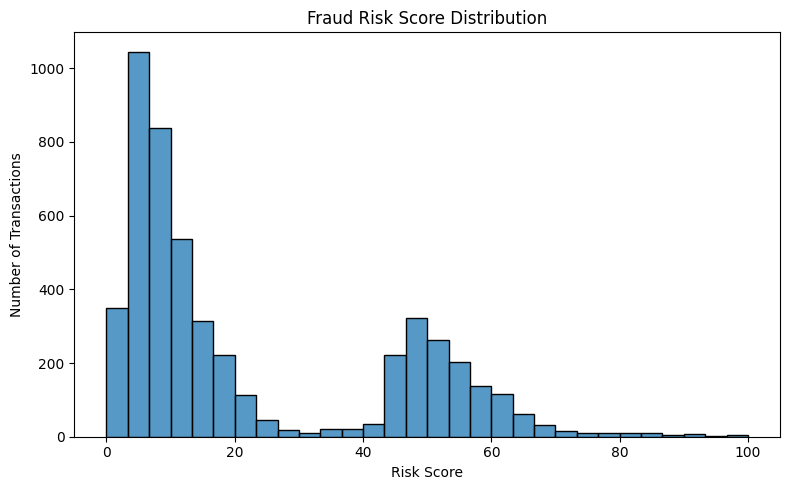

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["advanced_risk_score"], bins=30)
plt.title("Fraud Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()


In [ ]:
df.sort_values("advanced_risk_score", ascending=False)[
    ["final_risk_score", "advanced_risk_score", "explanation"]
].head(10)

NameError: name 'df' is not defined